# Problem Set 2


---

This assignment will introduce you to:
1. Understanding the power of ReLU activation.
2. Implementing your own autograd.
3. Implementing a simple MLP.
4. Basic functionality in PyTorch

Instructions: Click *Copy to drive* at the top and enter your solutions, the code has been tested on Colab.

Submission: please upload your completed solution .ipynb file to [Gradescope](https://www.gradescope.com/courses/591156) (Entry code: GP5DK6) by **Oct 9, 10PM EST**.

If you have issue viewing the figures or equations in this question set, you can refer to the PDF version [here](https://drive.google.com/file/d/1dCBvfZ1LBL667q-6ejddK3WLVfQvltxS/view?usp=sharing).

---

# Problem 1: Universal approximation power of ReLU networks (25 points)

As we dicussed in class, a two layer NN (i.e., a single hidden layer) with sigmoid activation function is a universal approximator: with sufficient hidden units, it can approximate any smooth, real function with desired accuracy. In this problem we want to demonstrate universal approximation power of NNs using ReLU activation units.  The setup is analogous to the sigmoid case, where we have a linear mapping with bias, followed by a componentwise ReLU activation, followed by another linear mapping with no bias.

## **Q1.1**
Show that, by composing only 2 hidden units in a ReLU network, i.e. $\hat{y} = \sum_{i=1}^2a_i\ max(0,b_ix+c_i)$, we can build an approximation to the step function $1[x>0]$.
The approximator should have value 1 for all values larger than some positive value $\delta$ and decreasing linearly for any value between 0 and $\delta$.

**Answer:**
My answer is in the attached written file

## **Q1.2**

Show that by composing 4 hidden units in a ReLU network; we can build an approximation to the unit impulse function of duration $\delta$

\begin{equation}
u_\delta(x) = 1[0\leq x\leq \delta]
\end{equation}

The approximator should have value $1$ between $\frac{\delta}{4}$ and $\frac{3\delta}{4}$ and should be increasing/decreasing on either side of this for a duration of $\frac{\delta}{2}$, i.e., it should be 0 for all values less than $\frac{-\delta}{4}$ and more than $\frac{5\delta}{4}$

**Answer:**
My answer is in the attached written file

## **Q1.3**
Using your approximator for the unit impulse function in Q3.2, complete the code given below to draw the approximator for different duration values $\delta$.

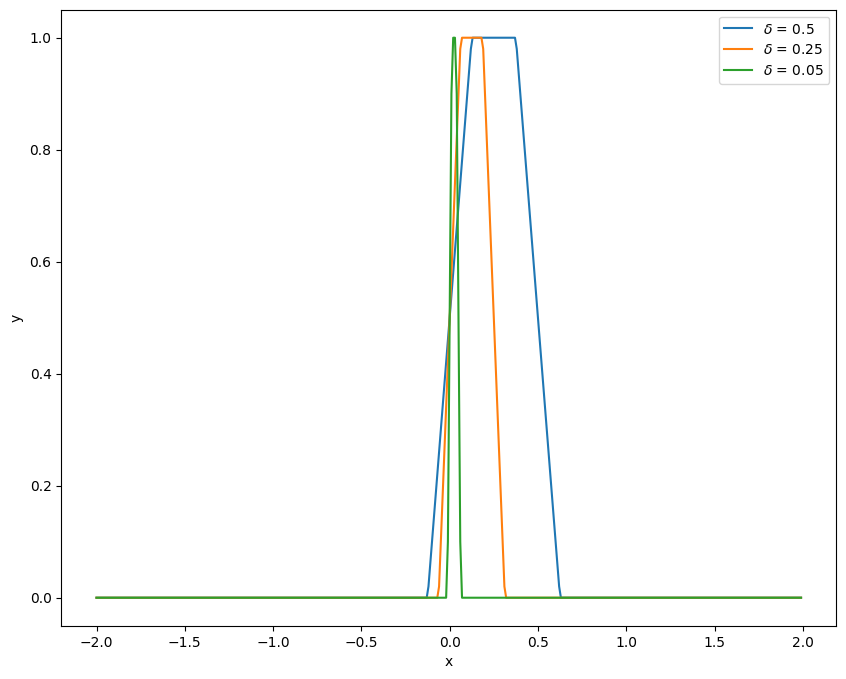

In [194]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

def hat_u_delta(x,delta):
    ## -- ! code required
    y = (2/delta)*(relu(x + delta/4) - relu(x - delta/4) - relu(x - (3/4)*delta) + relu(x - (5/4)*delta))
    return y

def draw_impulse(deltas):
    x = np.arange(-2, 2, 0.01).reshape((-1,1))
    for delta in deltas:
        plt.plot(x,hat_u_delta(x,delta))
    plt.legend(['$\delta$ = 0.5', '$\delta$ = 0.25', '$\delta$ = 0.05']);
    plt.xlabel('x')
    plt.ylabel('y');

draw_impulse([0.5, 0.25, 0.05])

## **Q1.4**
Imagine the idea of riemann integral, where we approximate the integrand function with unit impulse functions (fig(1)).
We will approximate the function $f(x)$ defined over $[a,b]$, using N impulse functions as follows:

$$\hat{f(x)} = \sum_{i=0}^{N-1} f(a + i \delta)\, u_\delta(x-i\delta), $$
where: $$\delta = \lfloor \frac{b-a}{N} \rfloor$$

![riemann-gif](https://drive.google.com/uc?id=1nY1BHbbEpdm7OE3USfc0BhbbEWlTmsvv)

Using your implemented approximator for unit impulse function in Q3.2; complete the code given bellow to approximate the $sin(x)$ function over $[0, 2\pi]$. The code will plot the approximation for different number of impule functions $N$.

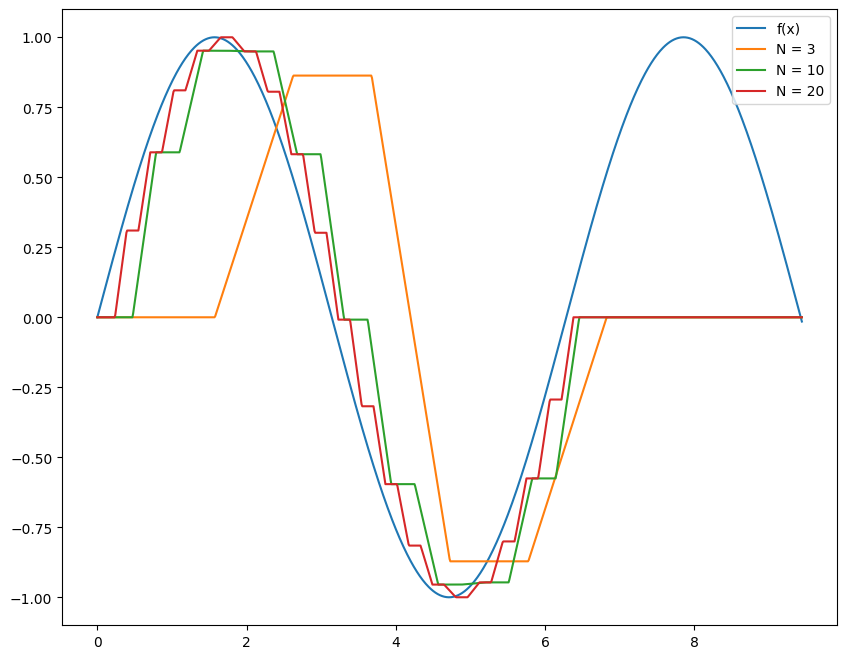

In [195]:
def f(x):
    return np.sin(x)

def hat_f(x,N,a,b):
    ## -- ! code required
    # Use the equations provided in the problem
    f_x_hat = np.zeros(x.shape)
    delta = (b-a)/N
    for i in range(N):
      f_x_hat += f(a + i*delta) * hat_u_delta(x - i*delta, delta)
    return f_x_hat

def draw_hat_f(N,a,b):
    x = np.arange(a, 1.5*b, 0.01).reshape((-1,1))
    plt.plot(x,f(x))
    for n in N:
        y = hat_f(x,n,a,b)
        plt.plot(x,y);
    plt.legend(["f(x)"]+["N = " + str(n) for n in N],loc = 'upper right')

draw_hat_f([3,10,20],0,2*3.15)

## **Q1.5**
Now consider using a polynomial activation function as opposed to the ReLU activation considered earlier (or the sigmoid activation that was discussed in class).  In this case, one can show that *no polynomial function* used as an activation can yield universality in a single hidden-unit network.  For concreteness and simplicity, let us consider using a simple quadratic activation function as follows:

$$\sigma(x) = x^2 + x + 1$$

This activation function is non-linear and will be applied componentwise at the hidden layer.  To demonstrate that this cannot be used as a universal approximator, consider the case where the input dimension is 1, and give an example of a function which such a network would not be able to approximate well.  (Hint: write down the form of the output $\hat{y}$ in this model.)



**Answer:**
A single-layer neural network has a form:
$$\mathbf{w}_2^T \cdot \sigma(\mathbf{w}_1 \cdot \mathbf{x} + \mathbf{b})
$$

Currently, we have a simple quadratic activation function with one single input $x$ to approximate any function. However, no matter how we adjust the parameters $(\mathbf{w}_2, \mathbf{w}_1, \ b) $, the neural network is limited to creating quadratice shapes. It cannot make more complex shapes than quadratic shapes.

Therfore, this network can only approximate quadratic patterns and there are some functions that cannot be accurately apprixmated with quadratics. As a result, this network cannot be used as a universal approximator.

## **Q1.6 (Bonus)**

While one cannot show that a polynomial function can be used as an activation function in a single hidden-layer network to approximate an arbitrary smooth function, if we allow the depth of the network to increase without bound (analogous to how we let the width of the network increase to prove universality earlier), then in this case one *can* show universality of the resulting model.

Consider the quadratic activation function from the previous question, and show that if we allow the depth to increase in this model (where each layer is a linear function with bias followed by the quadratic activation function), then the resulting network can approximate any continuous real-valued function on a compact domain.

**Answer:**
In the previous example, we use a quadratic activation function for a single hidden-layer network. If we add one more layer, we can create a fourth-degree polynomial activation function. If we add a third layer, we can create a eighth-degree polynomial activation function. Thus, with each additional layer, the polynomial's degree will increase.

Polynomials are known to be able to approximate any curve and lines. If we keep adding more layers to our network, the resulting function can become very flexible and can mimic any shape of line or curve that we desire. This means that it does not matter how complex a function might be, we can always find a polynomial that can imitates it very closely within a certain range.

If our neural network can create polynomials of increasing complexity by adding more layers, it means that this network can mimic any arbitrary function we can draw within a specific range. This in turns makes the neural network universal. In other words, the network achieves universality and can approximate any continuous real-valued function on a compact domain.

# Problem 2: Autograd implementation (35 points)

In class, we discussed the forward and back-propagation in network layers. We pass the input through a network layer and calculate the output of the layer straightforwardly. This step is called forward-propagation. Each layer also implements a function called 'backward'. Backward is responsible for the backward pass of back-propagation. The process of back-propagation follows the schemas: Input -> Forward calls -> Loss function -> derivative -> back-propagation of errors. In neural network, any layer can forward its results to many other layers, in this case, in order to do back-propagation, we sum the deltas coming from all the target layers.

In this problem, we will implement both forward and backward for the most commonly used layers including: linear, bias, ReLU, sigmoid, softmax, and cross-entropy.

In [196]:
'''backprop implementation with layer abstraction.
This could be made more complicated by keeping track of an actual DAG of
operations, but this way is not too hard to implement.
'''
import numpy as np


class Layer:
    '''A layer in a network.

    A layer is simply a function from R^n to R^d for some specified n and d.
    A neural network can usually be written as a sequence of layers:
    if the original input x is in R^d, a 3 layer neural network might be:

    L3(L2(L1(x)))

    We can also view the loss function as itself a layer, so that the loss
    of the network is:

    Loss(L3(L2(L1(x))))

    This class is a base class used to represent different kinds of layer
    functions. We will eventually specify a neural network and its loss function
    with a list:

    [L1, L2, L3, Loss]

    where L1, L2, L3, Loss are all Layer objects.

    Each Layer object implements a function called 'forward'. forward simply
    computes the output of a layer given its input. So instead of
    Loss(L3(L2(L1(x))), we write
    Loss.forward(L3.forward(L2.forward(L1.forward(x)))).
    Doing this computation finishes the forward pass of backprop.

    Each layer also implements a function called 'backward'. Backward is
    responsible for the backward pass of backprop. After we have computed the
    forward pass, we compute
    L1.backward(L2.backward(L3.backward(Loss.backward(1))))
    We give 1 as the input to Loss.backward because backward is implementing
    the chain rule - it multiplies gradients together and so giving 1 as an
    input makes the multiplication an identity operation.

    The outputs of backward are a little subtle. Some layers may have a
    parameter that specifies the function being computed by the layer. For
    example, a Linear layer maintains a weight matrix, so that
    Linear(x) = xW
    for some matrix W.
    The input to backward should be the gradient of the final loss with respect
    to the output of the current layer. The output of backprop should be the
    gradient of the final loss with respect to the input of the current layer,
    which is just the output of the previous layer. This is why it is correct
    to chain the outputs of backprop together. However, backward should ALSO
    compute the gradient of the loss with respect to the current layer's
    parameter and store this internally to be used in training.
    '''
    def __init__(self, parameter=None, name=None):
        self.name = name
        self.forward_called = False
        self.parameter = parameter
        self.grad = None

    def zero_grad(self):
        self.grad = None

    def forward(self, input):
        '''forward pass. Should compute layer and save relevant state
        needed for backward pass.
        Args:
            input: input to this layer.
        returns output of operation.
        '''
        raise NotImplementedError

    def backward(self, downstream_grad):
        '''Performs backward pass.

        This function should also set self.grad to be the gradient of the final
        output of the computation (loss) with respect to the layer's parameters.

        Args:
            downstream_grad: gradient from downstream operation in the
                computation graph. This package will only consider
                computation graphs that result in scalar outputs at the final
                node (e.g. loss function computations). As a result,
                the dimension of downstream_grad should match the dimension of
                the output of this layer.

                Formally, if this operation computes F(x), and the final
                computation computes a scalar, G(F(x)), then input_grad is
                dG/dF.
        returns:
            gradient to pass to upstream layers. If the layer computes F(x, w),
            where x is the input and w is the parameter of the layer, then
            the return value should be dF(x,w)/dx * downstream_grad. Here,
            x is in R^n, F(x, w) is in R^m, dF(x, w)/dx is a matrix in R^(n x m)
            downstream_grad is in R^m and * indicates matrix multiplication.

        We should also compute the gradient with respect to the parameter w.
        Again by chain rule, this is dF(x, w)/dw * downstream_grad
        '''
        raise NotImplementedError



Below shows an example of the full implementation of the Bias layer, including the forward and backward function. Notice self.grad stores the gradient of the loss with respect to the current layer's parameter.

In [197]:
class Bias(Layer):
    '''adds a constant bias.'''

    def __init__(self, bias, name="bias"):
        super(Bias, self).__init__(np.squeeze(bias), name)
        self.weights = np.squeeze(bias)

    def forward(self, input):
        self.input = input
        return self.parameter + self.input

    def backward(self, downstream_grad):
        self.grad = np.sum(downstream_grad, tuple(range(downstream_grad.ndim - self.parameter.ndim)))
        return downstream_grad


## **Q2.1** Multiplication layers.

Let's start with the basic linear and bias layer. Show the derivatives of linear and bias layer with respect to $X$ respectively.

$Z_{linear} = WX$



**Answer:**
Take the derivative with respect to $X$:
$$\frac{\partial Z_{linear}}{\partial X} = W $$

Complete the forward and backward function of the linear layer. In backward, you should ALSO set the self.grad to be the gradient of the loss with respect to the current layer's parameter.

In [198]:
class Linear(Layer):
    '''Linear layer. Parameter is NxM matrix L, input is matrix v of size B x N
    where B is batch size, output is vL.'''

    def __init__(self, weights, name="Linear"):
        super(Linear, self).__init__(weights, name)
        self.weights = weights

    def forward(self, input):
        ## -- ! code required
        # self.input = X
        # self.parameter = W
        # y = Wx + b, with b=0
        self.input = input
        y = np.dot(input, self.parameter)
        return y

    def backward(self, downstream_grad):
        '''downstream_grad should be NxB.'''
        if len(downstream_grad.shape) != 2:
            downstream_grad = np.reshape(
                downstream_grad, (len(downstream_grad), 1))
        ## -- ! code required
        # grad_X = (X^T) * G
        self.grad = np.dot(self.input.T, downstream_grad)
        # grad_w = (W^T) * G
        grad_w = np.dot(downstream_grad, self.parameter.T)
        return grad_w


## **Q2.2** Activation layers.

Now let's look at the activation layers. Show the derivatives of ReLU, sigmoid, and Leaky ReLU.
<p>
$ReLU(x) = max(0,x)$
</p>
<p>
$\sigma(x)=\frac{1}{1+e^{-x}}$
</p>
<p>
$LeakyReLU(x) = max(0.01x,x)$

Hint: Let's assume the gradient of ReLU is 0 when $x$ is 0 and the gradient of LeakyReLU is consistent for all values $x\leq0$

**Answer:**
My answer is in the attached written file

Complete the forward and backward functions. There is no need to update self.grad since there is no parameter in activation layers.

In [199]:
class ReLU(Layer):
    '''ReLU layer. No parameters.'''

    def __init__(self, name="ReLU"):
        super(ReLU, self).__init__(name=name)

    def forward(self, input):
        ## -- ! code required
        # relu_x = max(0,x)
        self.relu_x = np.maximum(0, input)
        return self.relu_x

    def backward(self, downstream_grad):
        ## -- ! code required
        # relu_x_grad = 1 if x>0; otherwise, = 0
        relu_x_grad = np.where(self.relu_x > 0, 1, 0)
        return relu_x_grad * downstream_grad


class Sigmoid(Layer):
    '''Sigmoid layer. No parameters.'''

    def __init__(self, name="Sigmoid"):
        super(Sigmoid, self).__init__(name=name)

    def forward(self, input):
        ## -- ! code required
        # Note: use "self." when I want to access the variable in another function
        # sigmoid(x) = 1/(1+e^(-x))
        self.sigmoid_x = 1/(1 + np.exp(-input))
        return self.sigmoid_x

    def backward(self, downstream_grad):
        ## -- ! code required
        # = sigmoid_x_grad * downstream_grad
        sigmoid_x_grad = self.sigmoid_x * (1 - self.sigmoid_x)
        return sigmoid_x_grad * downstream_grad


class LeakyReLU(Layer):
    '''LeakyReLU layer. No parameters.'''
    def __init__(self, alpha=0.01, name="LeakyReLU"):
        super(LeakyReLU, self).__init__(name=name)
        self.alpha = alpha

    def forward(self, input):
        ## -- ! code required
        # leakyrelu(x) = max(ax, x)
        self.leaky_x = np.maximum(self.alpha * input, input)
        return self.leaky_x

    def backward(self, downstream_grad):
        ## -- ! code required
        # leaky_x_grad = 1 if x>0; otherwise, = alpha
        leaky_x_grad = np.where(self.leaky_x > 0, 1, self.alpha)
        return leaky_x_grad * downstream_grad


## **Q2.3**  Loss *layers*.

Show the derivatives of SoftMax and Cross-entropy.

<p>
$\sigma(j)=\frac{\exp(w_j^Tx)}{\sum_{k}\exp(w_k^Tx)}$.
</p>

<p>
$L(\hat{y},y)=-yln(\hat{y}) - (1-y)ln(1-\hat{y})$
</p>


**Answer:**
My answer is in the attached written file


*Complete* the forward and backward functions. There is no need to update self.grad since there is no parameter in the layers.

Hint: You may find [np.einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) helpful when computing the gradient of SoftMax.

In [200]:
class SoftMax(Layer):
    '''SoftMax Layer, no parameters.'''

    def __init__(self, name="SoftMax"):
        super(SoftMax, self).__init__(name="softmax")

    def forward(self, input):
        '''input is BxN array, B is batch dimension.'''
        ## -- ! code required
        # Taken from my code in HW1
        # sigma_j = e(x)/ sum(e^x)
        numerator = np.exp(input - np.max(input, axis=1, keepdims=True))
        denominator = np.sum(numerator, axis=1, keepdims=True)
        self.sigma_j = numerator / denominator
        return self.sigma_j

    def backward(self, downstream_grad):
          '''downstream grad should be BxN array.'''
          ## -- ! code required
          # Case 1 = sigma_j(1[j = m]), when j = m
          N = downstream_grad.shape[1]
          case1 = np.einsum('bn,nm->bnm', self.sigma_j, np.identity(N))

          # Case 2 = -sigma_j * sigma_m, when j != m
          case2 = -np.einsum('bn,bm->bnm', self.sigma_j, self.sigma_j)

          # Compute the total derivative of softmax
          derivative = case1 + case2

          grad_result = np.einsum('bn,bnm->bm', downstream_grad, derivative)

          return grad_result


class CrossEntropy(Layer):
    '''cross entropy loss.'''

    def __init__(self, labels, name="Cross Entropy"):
        '''labels is BxC 1-hot vector for correct label.'''
        super(CrossEntropy, self).__init__(name="Cross Entropy")
        self.labels = labels

    def forward(self, input):
        '''input is BxN, output is a scalar. N == C.'''
        ## -- ! code required
        # Note: Number of classes = 3, use the categorical cross entropy loss function:
        # L(y_hat, y_i) = -(1/m)*sum(y_i * ln(y_hat))
        self.y_i = self.labels
        self.y_hat = input  # y_pred = input
        L = -np.sum(np.log(self.y_hat) * self.y_i, axis=1)
        L = L.mean()
        return L

    def backward(self, downstream_grad):
        ## -- ! code required
        # Note: Number of classes = 3, use the categorical cross entropy loss function:
        # L_grad = -y_i / y_hat
        # Need to divide over the batch size because gradient doesn't depend on it
        B = self.y_hat.shape[0]
        L_grad = ((-self.y_i / self.y_hat) * downstream_grad) / B
        return L_grad


## **Q2.4**

Now let's build a simple model using your layers, and compare the autograd results with the numeric derivatives. If everything is implemented in the correct way, the autograd results should be very closed to numeric grad.

In [201]:
# This function computes the derivative numerically using the formula (f(x+delta) - f(x))/delta with small delta. First, we would compute
# f(x) which is the original output. Then we perturb the input by a small delta then compute f(x+delta). Finally, we calculate
# the difference and divide by delta to get the derivative.
def numerical_derivative(layers, input):
    base_output = forward_layers(layers, input)
    delta = 1e-7

    for layer in layers:
        if layer.parameter is None:
            continue
        size = layer.parameter.size # total number of params
        shape = layer.parameter.shape # shape of params
        base_param = np.copy(layer.parameter)
        perturb = np.zeros(size)
        grad = np.zeros(size)

        for i in range(size):
            perturb[i] = delta # only current i-th perturb is non-zero
            layer.parameter = base_param + np.reshape(perturb, shape) # make a small change (delta) on the i-th parameter
            perturb_output = forward_layers(layers, input) # new output after adding a small change (delta) on the i-th parameter
            grad[i] = (perturb_output - base_output) / delta # update the grad of i-th parameter
            perturb[i] = 0.0 # set it back to zero

        layer.parameter = base_param
        layer.grad = np.reshape(np.copy(grad), shape)

def forward_layers(layers, input):
    '''Forward pass on all the layers. Must be called before backwards pass.'''
    output = input
    for layer in layers:
        output = layer.forward(output)
    #assert output.size == 1, "only supports computations that output a scalar!"
    return output


def backward_layers(layers):
    '''runs a backward pass on all the layers.
    after this function is finished, look at layer.grad to find the
    gradient with respect to that layer's parameter.'''
    downstream_grad = np.array([1])
    for layer in reversed(layers):
        downstream_grad = layer.backward(downstream_grad)



def zero_grad(layers):
    for layer in layers:
        layer.zero_grad()


def test_autograd():
    h = 2
    b = 3
    input = np.random.normal(np.zeros((b, h)))
    labels = np.array([0,0,1]).reshape(3,1)
    layers = [
        Linear(np.random.normal(size=(h, 2 * h))),
        Sigmoid(),
        Bias(np.array([np.random.normal()])),
        Linear(np.random.normal(size=(2 * h, 3 * h))),
        ReLU(),
        Linear(np.random.normal(size=(3 * h, h))),
        SoftMax(),
        CrossEntropy(labels)
    ]
    output = forward_layers(layers, input)
    backward_layers(layers)
    analytics = [np.copy(layer.grad)
                 for layer in layers if layer.grad is not None]
    zero_grad(layers)

    numerical_derivative(layers, input)
    numerics = [np.copy(layer.grad)
                for layer in layers if layer.grad is not None]
    # Computing the difference between the derivative of our implemented function and the numerical derivative
    diff = np.sum([np.linalg.norm(analytic - numeric)/np.linalg.norm(numeric)
                   for analytic, numeric in zip(analytics, numerics)])

    assert diff < 1e-4, "autograd differs by {} from numeric grad!".format(diff)


if __name__ == "__main__":
    test_autograd()
    print("looking good!")


looking good!


## Problem 3: Implementing a simple MLP (25 points)

In this problem we will develop a neural network with fully-connected layers, aka Multi-Layer Perceptron (MLP) using the layers from Problem 2. Below, we initialize toy data  that we will use to develop your implementation.

In [202]:
# setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()
print ('X = ', X)
print('\n')
print('y = ', y)

X =  [[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


y =  [0 1 2 2 1]


We will use the following class `TwoLayerMLP` to implement our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays.


In [203]:
class TwoLayerMLP(object):
    def __init__(self, input_size, hidden_size, num_classes, std=1e-1, activation = None):
        np.random.seed(0)
        self.input_size = input_size
        self.num_classes = num_classes
        self.params = {}

        ## TODO: Initialize your parameters below using input_size, hidden_size, label_size
        ## the weights of the linear layers are normally distributed with standard deviation = std
        ## and mean = 0. The bias is zero. The structure of the network is as follows:
        ## linear1 -> bias1 -> LeakyReLU -> linear 2 -> bias 2

        # Layers: input layer (input_size) => hidden layer (hidden_size) => output layer (num_classes)
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)  ## -- ! code required
        self.params['W2'] = std * np.random.randn(hidden_size, num_classes) ## -- ! code required

        # The bias is zero
        self.params['b1'] = np.zeros(hidden_size) ## -- ! code required
        self.params['b2'] = np.zeros(num_classes) ## -- ! code required
        self.activation = 'LeakyReLU'             ## -- ! code required


        self.models = [
                  Linear(self.params['W1']),
                  Bias(self.params['b1']),
                  LeakyReLU(alpha=0.01),
                  Linear(self.params['W2']),
                  Bias(self.params['b2']),
                  SoftMax()
                ]


    def loss(self, X, y=None, reg=0.0):
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        _, C = W2.shape
        N, D = X.shape

        ###########################################################################
        # TODO: Finish the forward pass, and compute the loss. This should be the
        # data loss. Store the result in the variable loss, which should be a scalar.
        # Use the CrossEntropy loss. So that your results match ours.
        ###########################################################################
        ## -- ! code required

        # Get the output of neural network by passing input X through forward_layers function with the current model parameters stored in self.models
        # From 2.4: output = forward_layers(layers, input)
        input = X
        output = forward_layers(self.models, input)

        # 2D array 'labels'
        # C = number of classes
        # create one-hot encoded labels with ones on the diagonals
        # for each sample i, true class is also at i
        y_labels = np.eye(C)[y]

        # Creates an instance CrossEntropy class, creating the cross-entropy loss function
        # From 2.3: class CrossEntropy(Layer)
        loss_layer = CrossEntropy(y_labels)

        # Calculate the loss by passing the output through the 'forward'
        # From 2.3: forward(self, input), in CrossEntropy class:
        input = output
        loss = loss_layer.forward(input)


        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################

        grads = {}
        ###########################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights
        # and biases. Store the results in the grads dictionary. For example,
        # grads['W1'] should store the gradient on W1, and be a matrix of same size
        ###########################################################################
        ## -- ! code required

        # From 2.4: def backward_layers(layers):
        # downstream_grad = 1 because during backward pass, we start from the final loss and its derivative wrt itself = 1
        downstream_grad = np.array([1])

        # Calculate the gradient of the final loss concerning the inputs of the network's output layer
        downstream_grad = loss_layer.backward(downstream_grad)

        # From 'def backward_layers(self, downstream_grad)' right below:
        # run a backward pass on all layers to find the gradient wrt that layer's parameter
        for layer in reversed(self.models):
          downstream_grad = layer.backward(downstream_grad)

        # Store the grads dictionary
        grads = {
            'W1': self.models[0].grad,
            'b1': self.models[1].grad,
            'W2': self.models[3].grad,
            'b2': self.models[4].grad
        }


        ###########################################################################
        #                            END OF YOUR CODE
        ###########################################################################
        return loss, grads

    def backward_layers(self, downstream_grad):
        '''runs a backward pass on all the layers.
        after this function is finished, look at layer.grad to find the
        gradient with respect to that layer's parameter.'''
        for layer in reversed(self.models):
            downstream_grad = layer.backward(downstream_grad)

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_epochs=10,
            batch_size=200, verbose=False):

        num_train = X.shape[0]
        iterations_per_epoch = 1 #int(max(num_train / batch_size, 1))
        epoch_num = 0

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        grad_magnitude_history = []
        train_acc_history = []
        val_acc_history = []

        np.random.seed(1)
        for epoch in range(num_epochs):
            # fixed permutation (within this epoch) of training data
            perm = np.random.permutation(num_train)

            # go through minibatches
            for it in range(iterations_per_epoch):
                X_batch = None
                y_batch = None

                # Create a random minibatch
                idx = perm[it*batch_size:(it+1)*batch_size]
                X_batch = X[idx, :]
                y_batch = y[idx]

                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)

                # do gradient descent
                for param in self.params:
                    self.params[param] -= grads[param] * learning_rate

                # record gradient magnitude (Frobenius) for W1
                grad_magnitude_history.append(np.linalg.norm(grads['W1']))

            # Every epoch, check train and val accuracy and decay learning rate.
            # Check accuracy
            train_acc = (self.predict(X_batch) == y_batch).mean()
            val_acc = (self.predict(X_val) == y_val).mean()
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)
            if verbose:
                print ('Epoch %d: loss %f, train_acc %f, val_acc %f'%(
                    epoch+1, loss, train_acc, val_acc))

            # Decay learning rate
            learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'grad_magnitude_history': grad_magnitude_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!
        ###########################################################################
        ## -- ! code required
        # Forward pass on all layers to get the output probabilities for each class based on input X
        # From 2.4: def forward_layers(layers, input):
        input = X
        output = forward_layers(self.models, input)

        # Find the index (class label) with the highest probability for each sample
        y_pred = np.argmax(output, axis=1)

        ###########################################################################
        #                              END OF YOUR CODE
        ###########################################################################
        return y_pred




### Q3.1 Forward pass

Our 2-layer MLP uses a mean squared error loss layer defined in Problem 2.

Please take a look at method `TwoLayerMLP.loss`. This function takes in the data and weight parameters, and computes the class scores (output of the forward layer), the loss ($L$), and the gradients on the parameters.

- Use the layers designed in **Problem 2** and implement the first part of the function to compute `scores` and `loss`. Afterwards, run the following two test cases.

Note 1: It should be VERY simple to compute the forward propagation by calling the **forward_layers**().

Note 2: **If you're not careful, you could run into numerical underflow/overflow problems with softmax and cross-entropy.** In particular, it involves the [log-sum-exp operation](https://en.wikipedia.org/wiki/LogSumExp) where exponentiated numbers are summed. This can result in underflow/overflow, e.g. getting "nan" (stands for Not A Number) for seemingly ordinary numerical operations. Read about the solution in the link.

In [204]:
input_size = 4
hidden_size = 10
num_classes = 3

net = TwoLayerMLP(input_size, hidden_size, num_classes)
scores = forward_layers(net.models, X)
print ('(1) Your scores:\n')
print (scores)
print ('\n')
correct_scores = np.asarray([[0.374083, 0.312271,  0.313644],
                            [0.378308, 0.311404, 0.310286],
                            [0.392588, 0.306650, 0.300761],
                            [0.391516, 0.310674, 0.297809],
                            [0.389314, 0.313829, 0.296856]])

# The difference should be very small
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))
print ('\n')

loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.1443


# The difference should be very small
print ('(2) Your loss: %f'%(loss))
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

(1) Your scores:

[[0.36330938 0.22923584 0.40745478]
 [0.47373816 0.17268494 0.3535769 ]
 [0.42913159 0.26169104 0.30917737]
 [0.41481755 0.29845954 0.28672291]
 [0.36274091 0.32294462 0.31431447]]


Difference between your scores and correct scores:
0.6547278795080129


(2) Your loss: 1.264428
Difference between your loss and correct loss:
0.12012811780150634


## **Q3.2** Backward pass
- Implement the second part to compute gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`, stored in `grads`.

Hint: you can quickly get the gradients with respect to parameters by calling **self.backward_layers**(downstream_grad).

Now debug your backward pass using a numeric gradient check.

In [205]:
# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
  """
  a naive implementation of numerical gradient of f at x
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print (ix, grad[ix])
    it.iternext() # step to next dimension

  return grad

loss, grads = net.loss(X, y, reg=0.1)

# these should all be very small
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.045555e-08
b1 max relative error: 9.285606e-08
W2 max relative error: 1.603660e-09
b2 max relative error: 5.731285e-11


## **Q3.3** Train the LeakyReLU network
To train the network we will use stochastic gradient descent (SGD), implemented in `TwoLayerNet.train`. Train the two-layer network and plot the ['loss_history']. We don't expect you to optimize the training process. As long as the the loss graph looks resonable (loss is going down), you will get full credits.


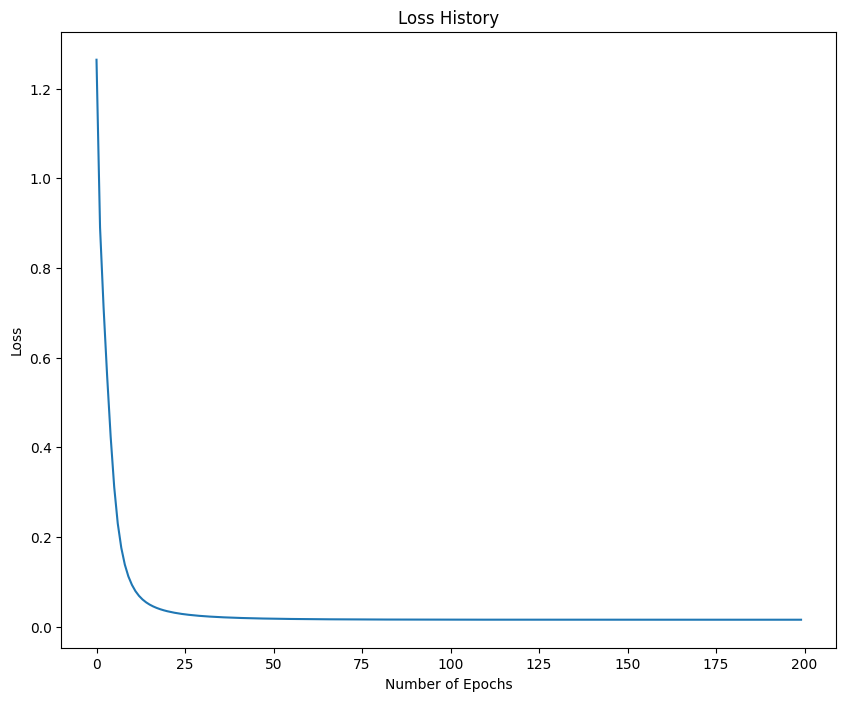

In [206]:
net = TwoLayerMLP(input_size, hidden_size, num_classes)
## TODO: Plot ['loss_history'] here
## -- ! code required

# Because we only train, set X_val = X, Y_val = y
# def train(self, X, y, X_val, y_val, learning_rate=1e-3, learning_rate_decay=0.95, reg=1e-5, num_epochs=10, batch_size=200, verbose=False):
outputs = net.train(X, y, X, y, learning_rate=0.1, learning_rate_decay=0.95, reg=1e-5, num_epochs=200, batch_size=200, verbose=False)

plt.plot(outputs['loss_history'])
plt.title('Loss History')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


# Problem 4: Pytorch Intro (15 points)
## **Q4.0**: Pytorch tutorials
This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

Before starting the homework, please go over these introductory tutorials on the PyTorch webpage:

*   [60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [207]:
import torch

The `torch.Tensor` class is the basic building block in PyTorch and is used to hold data and parameters. The `autograd` package provides automatic differentiation for all operations on Tensors. After reading about Autograd in the tutorials above,  we will implement a few simple examples of what Autograd can do.

## **Q4.1**. Simple function
 Use `autograd` to do backpropagation on the simple function we saw in lecture, $f=(x+y)*z$.

**Q4.1.1** Create the three inputs with values $x=-2$, $y=5$ and $z=-4$ as tensors and set `requires_grad=True` to track computation on them.



In [208]:
# solution here
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)


**Q4.1.2** Compute the $q=x+y$ and $f=q \times z$ functions, creating tensors for them in the process. Print out $q,f$, then run `f.backward(retain_graph=True)`, to compute the gradients w.r.t. $x,y,z$. The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it (freeing some memory). Print the gradients. Note that the gradient for $q$ will be `None` since it is an intermediate node, even though `requires_grad` for it is automatically set to `True`. To access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2). Compute the values by hand (or check the slides) to verify your solution.

In [209]:
# solution here
q = x+y
f = q*z
print("q:", q)
print("z:", z)
f.backward(retain_graph=True)
print("x gradient:", x.grad)
print("y gradient:", y.grad)
print("z gradient:", z.grad)
print("q gradient:", q.grad)
print("f gradient:", f.grad)


q: tensor(3., grad_fn=<AddBackward0>)
z: tensor(-4., requires_grad=True)
x gradient: tensor(-4.)
y gradient: tensor(-4.)
z gradient: tensor(3.)
q gradient: None
f gradient: None


<ipython-input-209-c4babeaa2c66>:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("q gradient:", q.grad)
<ipython-input-209-c4babeaa2c66>:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull

**Q4.1.3** If we now run `backward()` again, it will add the gradients to their previous values. Try it by running the above cell multiple times. This is useful in some cases, but if we just wanted to re-compute the gradients again, we need to zero them first, then run `backward()`. Add this step, then try running the  backward function multiple times to make sure the answer is the same each time!

In [210]:
# solution here
# zero the gradients to recompute the gradients again
x.grad.zero_()
y.grad.zero_()
z.grad.zero_()
print("x gradient:", x.grad)
print("y gradient:", y.grad)
print("z gradient:", z.grad)
print("q gradient:", q.grad)
print("f gradient:", f.grad)
print()
f.backward(retain_graph=True)
print("x gradient:", x.grad)
print("y gradient:", y.grad)
print("z gradient:", z.grad)
print("q gradient:", q.grad)
print("f gradient:", f.grad)
print()


x gradient: tensor(0.)
y gradient: tensor(0.)
z gradient: tensor(0.)
q gradient: None
f gradient: None

x gradient: tensor(-4.)
y gradient: tensor(-4.)
z gradient: tensor(3.)
q gradient: None
f gradient: None



<ipython-input-210-adf56046db73>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("q gradient:", q.grad)
<ipython-input-210-adf56046db73>:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/

## **Q4.2** Neuron
 Implement the function corresponding to one neuron (logistic regression unit) that we saw in the lecture and compute the gradient w.r.t. $x$ and $w$. The function is $f=\sigma(w^Tx)$ where $\sigma()$ is the sigmoid function. Initialize $x=[-1, -2, 1]$ and the weights to $w=[2, -3, -3]$ where $w_3$ is the bias. Print out the gradients and double check their values by hand.

In [211]:
# solution here
x = torch.tensor([-1., -2., 1.], requires_grad=True)
w = torch.tensor([2., -3., -3.], requires_grad=True)

# sigmoid = 1/(1+e^(-wx))
f_sigmoid = 1/(1 + torch.exp(-torch.dot(x, w)))
f_sigmoid.backward(retain_graph=True)
print("x gradient:", x.grad)
print("w gradient:", w.grad)


x gradient: tensor([ 0.3932, -0.5898, -0.5898])
w gradient: tensor([-0.1966, -0.3932,  0.1966])


## **Q4.3**. torch.nn
 We will now implement the same neuron function $f$ with the same variable values as in Q1.2, but using the `Linear` class from `torch.nn`, followed by the [Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid) class. In general, many useful functions are already implemented for us in this package. Compute the gradients $\partial f/\partial w$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.)

In [212]:
# solution here
import torch.nn as nn

# Create linear layer with 2 inputs and 1 output
f_linear = nn.Linear(2, 1, bias=True)

# In w = [2., -3., -3.], let first 2 terms = weights, the last term = bias
f_linear.weight.data = torch.tensor([[2., -3.]])  # Set the weights of linear layer = [2, -3]
f_linear.bias.data = torch.tensor([-3.])          # Set the bias = -3

f_sigmoid = nn.Sigmoid()
input = torch.tensor([-1., -2.])    # Set the first two terms as inputs
f = f_sigmoid(f_linear(input))

f.backward(retain_graph=True)   # Run backward

# Gradients are stored in Linear variable
print("Gradient of f wrt weight:", f_linear.weight.grad)
print("Gradient of f wrt bias:", f_linear.bias.grad)

Gradient of f wrt weight: tensor([[-0.1966, -0.3932]])
Gradient of f wrt bias: tensor([0.1966])


## **Q4.4** Module
 Now lets put these two functions (Linear and Sigmoid) together into a "module". Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you have not already.

**Q4.4.1** Make a subclass of the `Module` class, called `Neuron`. Set variables to the same values as above. You will need to define the `__init__` and `forward`



In [213]:
# solution here
import torch.nn as nn

class Neuron(nn.Module):

    def __init__(self):
        super(Neuron, self).__init__()
        ## -- ! code required
        # Create linear layer with 2 inputs and 1 output
        self.linear = nn.Linear(2, 1, bias=True)

        # In w = [2., -3., -3.], let first 2 terms = weights, the last term = bias
        self.linear.weight.data = torch.tensor([[2., -3.]])  # Set the weights of linear layer = [2, -3]
        self.linear.bias.data = torch.tensor([-3.])          # Set the bias = -3

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        ## -- ! code required
        x = self.linear(x)
        x = self.sigmoid(x)
        return x



**Q4.4.2** Now create a  variable of your `Neuron` class called `my_neuron` and run backpropagation on it. Print out the gradients again. Make sure you zero out the gradients first, by calling `.zero_grad()` function of the parent class. Even if you will not re-compute the backprop, it is good practice to do this every time to avoid accumulating gradient!

In [214]:
# solution here
my_neuron = Neuron()

# Set the first two terms as inputs
input = torch.tensor([-1., -2.])

# Run forward
output = my_neuron(input)

# Zero out the gradients to avoid accumulating gradient and 'nan'
my_neuron.zero_grad()

# Run backward
output.backward()

# Gradients are stored in Linear variable
print("Gradient of my_neuron wrt weight:", my_neuron.linear.weight.grad)
print("Gradient of my_neuron wrt bias:", my_neuron.linear.bias.grad)

Gradient of my_neuron wrt weight: tensor([[-0.1966, -0.3932]])
Gradient of my_neuron wrt bias: tensor([0.1966])


## **Q4.5**. Loss and SGD
 Now, lets train our neuron on some data. The code below creates a toy dataset containing a few inputs $x$ and outputs $y$ (a binary 0/1 label), as well as a function that plots the data and current solution.

w0 = 2.0 w1 = -3.0 bias = -3.0


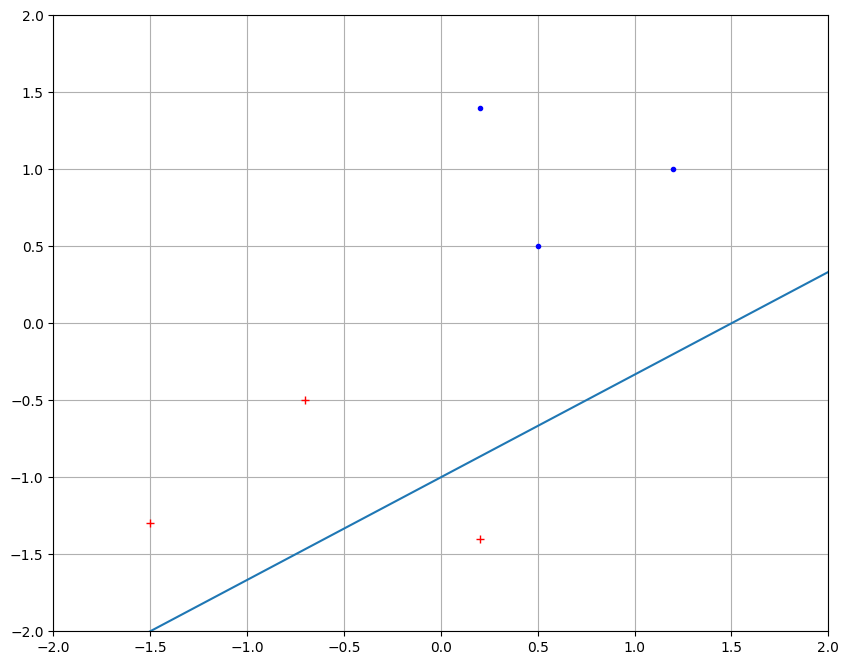

In [215]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (0/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5],
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5]])


y = torch.tensor([0, 0, 0, 1, 1, 1 ])

def plot_soln(x, y, params):
  plt.plot(x[y==1,0], x[y==1,1], 'r+')
  plt.plot(x[y==0,0], x[y==0,1], 'b.')
  plt.grid(True)
  plt.axis([-2, 2, -2, 2])



  # NOTE : This may depend on how you implement Neuron.
  #   Change accordingly
  w0 = params[0][0][0].item()
  w1 = params[0][0][1].item()
  bias = params[1][0].item()

  print("w0 =", w0, "w1 =", w1, "bias =", bias)
  dbx = torch.tensor([-2, 2])
  dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
  plt.plot(dbx, dby)

params = list(my_neuron.parameters())
plot_soln(x, y, params)

**Q4.5.1** Declare an object `criterion` of type `nn.CrossEntropyLoss`. Note that this can be called as a function on two tensors, one representing the network outputs and the other, the targets that the network is being trained to predict, to return the loss. Print the value of the loss on the dataset using the initial weights and bias defined above in Q1.2.

In [216]:
# solution here
# Declare an object 'criterion' of type nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

# Pass the input tensor 'x' through network model my_neuron and get the prediction
# predictions = the probabilities of the input belonging to positive (+) class in binary setting
predictions = my_neuron(x)

# Concat the predictions with its complement, which is the negative (-) class probabilities
positive = predictions
negative = 1 - predictions
loss = criterion(torch.cat((positive, negative), axis=1), y)

# Print the loss
print("Loss:", loss.item())


Loss: 0.942585289478302


**Q4.5.2** Print out the chain of `grad_fn` functions backwards starting from `loss.grad_fn`  to demonstrate what backpropagation will be run on.

In [217]:
grad_fn = loss.grad_fn

# Recursive function to print grad_fn and its next functions
def print_grad_fn(grad_fn):
    print(grad_fn)
    # Check if the grad_fn has 'next_functions' that isn't empty
    if grad_fn.next_functions:
        print_grad_fn(grad_fn.next_functions[0][0])

print_grad_fn(grad_fn)


**Q4.5.3** Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` package to train your classifier on the toy dataset. Use the entire dataset in each batch. Use a learning rate of $0.01$ (no other hyperparameters). You will need to write a training loop that uses the `.step()` function of the optimizer. Plot the solution and print the loss after 1000 iterations.

Loss at 0 iterations: 0.942585289478302
Loss at 1000 iterations: 0.870650589466095
Loss at 2000 iterations: 0.809097945690155
Loss at 3000 iterations: 0.7214835286140442
Loss at 4000 iterations: 0.5652392506599426
Loss at 5000 iterations: 0.40517446398735046
Loss at 6000 iterations: 0.3552912473678589
Loss at 7000 iterations: 0.34059178829193115
Loss at 8000 iterations: 0.33383581042289734
Loss at 9000 iterations: 0.3299368917942047
loss = 0.3273821175098419
w0 = 4.141496658325195 w1 = 2.4262382984161377 bias = -0.8129551410675049


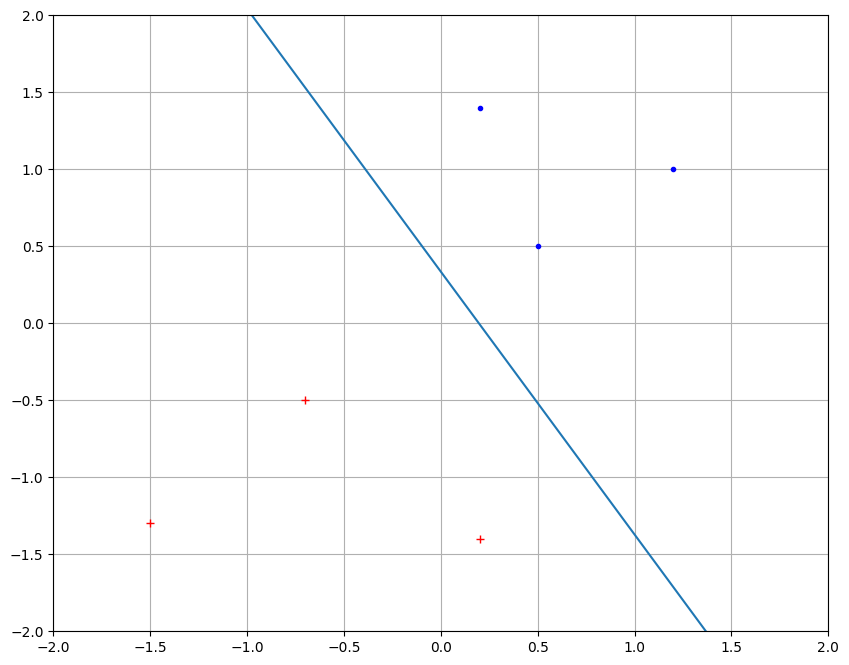

In [218]:
# solution here
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(my_neuron.parameters(), lr=0.01)

# training loop
for i in range(10000):
  ## -- ! code required for your training loop:

  # Zero out gradient to avoid 'nan' and gradient accumulation
  optimizer.zero_grad()

  # Get the (+) predictions from network
  predictions = my_neuron(x)

  # Compute the loss of (+) and (-) classes
  positive = predictions
  negative = 1 - predictions
  loss = criterion(torch.cat((positive, negative), axis=1), y)

  # print the loss after 1000 iterations
  if i % 1000 == 0:
    print('Loss at', i, 'iterations:', loss.item())

  # Compute the gradient of current tensor
  loss.backward()

  # Update the parameters
  optimizer.step()

print("loss =", loss.item())
params = list(my_neuron.parameters())
plot_soln(x, y, params)

**Q4.5.4** How many thousands of iterations does it take (approximately) until the neuron learns to classify the data correctly? **bold text**

***Solution***:
5000 iterations


## **Q4.6**. Hidden space ablation

Now let's look at the size of network's hidden space. We will create and train a **2-layer MLP** network on the [SVHN Dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.SVHN.html).

The SVHN dataset consists of photos of house numbers, collected automatically using Google's Street View. Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. Google’s Street View imagery contains hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. Below are example images from the dataset. Note that for this dataset, each image (32x32 pixels) has been cropped around a single number in its center, which is the number we want to classify.

![SVHN images](https://www.researchgate.net/profile/Georgios-Drainakis/publication/346718116/figure/fig2/AS:966456476987393@1607432588092/Representation-of-SVHN-dataset.ppm)

In this problem, we turn the input images into grayscale and then flat them into 1-D vector. First, download the SVHN dataset using `torchvision` and display the images in the first batch. Take a look at the [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) tutorial for an example. Follow the settings used there, such as the normalization, batch size of 4 for the `torch.utils.data.DataLoader`, etc.


Using downloaded and verified file: ./data/train_32x32.mat
    1     7     3     1


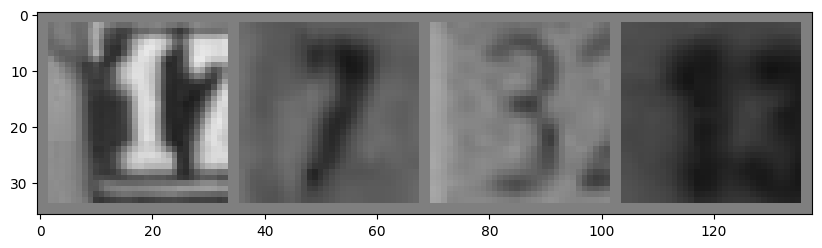

In [219]:
# solution here
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.SVHN(root='./data', split='train', transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')



# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)



# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Q4.6.1 2-layer MLP

Next, we will train a 2-layer MLP on the data. We have defined a simple 2-layer MLP for you with two fc layers and LeakyReLU activation.



In [220]:
# solution here
import torch.nn as nn
import torch.nn.functional as F

class Neuron(nn.Module):
    def __init__(self, hidden_size):
        super(Neuron, self).__init__()
        self.l1 = nn.Linear(1024, hidden_size)
        self.l2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 1024)
        x = F.leaky_relu(self.l1(x))
        x = self.l2(x)
        return x

You can check the number of parameters in the model by printing out the model summary.

In [221]:
def model_summary(model):
  print("model_summary")
  print()
  print("Layer_name"+"\t"*7+"Number of Parameters")
  print("="*100)
  model_parameters = [layer for layer in model.parameters() if layer.requires_grad]
  layer_name = [child for child in model.children()]
  j = 0
  total_params = 0
  print("\t"*10)
  for i in layer_name:
    print()
    param = 0
    try:
      bias = (i.bias is not None)
    except:
      bias = False
    if not bias:
      param =model_parameters[j].numel()+model_parameters[j+1].numel()
      j = j+2
    else:
      param =model_parameters[j].numel()
      j = j+1
    print(str(i)+"\t"*3+str(param))
    total_params+=param
  print("="*100)
  print(f"Total Params:{total_params}")

my_neuron = Neuron(10)
model_summary(my_neuron)

model_summary

Layer_name							Number of Parameters
										

Linear(in_features=1024, out_features=10, bias=True)			10240

Linear(in_features=10, out_features=10, bias=True)			10
Total Params:10250


Instantiate the cross-entropy loss `criterion`, and an SGD optimizer from the `torch.optim` package with learning rate $.001$ and momentum $.9$. You may also want to enable GPU training using `torch.device()`.

**Use GPU in Colab**: click *Runtime* in the menu bar -> click *Change runtime type* -> select *T4 GPU*

In [222]:
# solution here
import torch.optim as optim

criterion = nn.CrossEntropyLoss() ## -- ! code required
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001, momentum=0.9) ## -- ! code required (taken from previous question)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# if we set the hardware to GPU in the Notebook settings, this should print a CUDA device:
print(device)

my_neuron.to(device)



cpu


Neuron(
  (l1): Linear(in_features=1024, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
)

### Q4.6.2 Training
Complete the training loop that makes five full passes through the dataset (five epochs) using SGD. Your batch size should be 4 and hidden size is 10.
*italicized text*

In [223]:
my_neuron = Neuron(10)

# create your optimizer
criterion = nn.CrossEntropyLoss() # from above
optimizer = optim.SGD(my_neuron.parameters(), lr=0.001, momentum=0.9) # from above
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# num of epoch
stats = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    ## -- ! code required

    # Zero out gradient to avoid 'nan'
    optimizer.zero_grad()

    # Get the predictions from network
    predictions = my_neuron(inputs)

    # Compute the loss between predictions and labels
    loss = criterion(predictions, labels)

    # Compute the gradient of current tensor
    loss.backward()

    # Update the parameters
    optimizer.step()


    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 2.219
[1,  4000] loss: 1.966
[1,  6000] loss: 1.762
[1,  8000] loss: 1.581
[1, 10000] loss: 1.504
[1, 12000] loss: 1.452
[1, 14000] loss: 1.426
[1, 16000] loss: 1.371
[1, 18000] loss: 1.363
[2,  2000] loss: 1.349
[2,  4000] loss: 1.337
[2,  6000] loss: 1.335
[2,  8000] loss: 1.335
[2, 10000] loss: 1.322
[2, 12000] loss: 1.328
[2, 14000] loss: 1.295
[2, 16000] loss: 1.312
[2, 18000] loss: 1.298
[3,  2000] loss: 1.257
[3,  4000] loss: 1.280
[3,  6000] loss: 1.298
[3,  8000] loss: 1.274
[3, 10000] loss: 1.254
[3, 12000] loss: 1.277
[3, 14000] loss: 1.270
[3, 16000] loss: 1.266
[3, 18000] loss: 1.287
[4,  2000] loss: 1.252
[4,  4000] loss: 1.241
[4,  6000] loss: 1.261
[4,  8000] loss: 1.258
[4, 10000] loss: 1.245
[4, 12000] loss: 1.248
[4, 14000] loss: 1.255
[4, 16000] loss: 1.232
[4, 18000] loss: 1.223
[5,  2000] loss: 1.217
[5,  4000] loss: 1.222
[5,  6000] loss: 1.225
[5,  8000] loss: 1.230
[5, 10000] loss: 1.224
[5, 12000] loss: 1.252
[5, 14000] loss: 1.237
[5, 16000] 

Train the model again but this time set the hidden size as 100.


In [224]:
my_neuron_large = Neuron(100)

# create your optimizer
criterion = nn.CrossEntropyLoss() # from above
optimizer = optim.SGD(my_neuron_large.parameters(), lr=0.001, momentum=0.9) # from above

# num of epoch
stats_v2 = []
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # inputs, labels = inputs.to(device), labels.to(device) #If you're using GPU uncomment this
    ## -- ! code required

    # Zero out gradient to avoid 'nan'
    optimizer.zero_grad()

    # Get the predictions from network
    predictions = my_neuron_large(inputs)

    # Compute the loss between predictions and labels
    loss = criterion(predictions, labels)

    # Compute the gradient of current tensor
    loss.backward()

    # Update the parameters
    optimizer.step()



    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        stats_v2.append(running_loss / 2000)
        running_loss = 0.0


[1,  2000] loss: 2.116
[1,  4000] loss: 1.631
[1,  6000] loss: 1.379
[1,  8000] loss: 1.216
[1, 10000] loss: 1.144
[1, 12000] loss: 1.134
[1, 14000] loss: 1.053
[1, 16000] loss: 0.998
[1, 18000] loss: 0.970
[2,  2000] loss: 0.924
[2,  4000] loss: 0.895
[2,  6000] loss: 0.911
[2,  8000] loss: 0.897
[2, 10000] loss: 0.860
[2, 12000] loss: 0.840
[2, 14000] loss: 0.844
[2, 16000] loss: 0.821
[2, 18000] loss: 0.795
[3,  2000] loss: 0.752
[3,  4000] loss: 0.773
[3,  6000] loss: 0.790
[3,  8000] loss: 0.759
[3, 10000] loss: 0.732
[3, 12000] loss: 0.720
[3, 14000] loss: 0.764
[3, 16000] loss: 0.713
[3, 18000] loss: 0.723
[4,  2000] loss: 0.681
[4,  4000] loss: 0.722
[4,  6000] loss: 0.679
[4,  8000] loss: 0.696
[4, 10000] loss: 0.696
[4, 12000] loss: 0.640
[4, 14000] loss: 0.699
[4, 16000] loss: 0.676
[4, 18000] loss: 0.682
[5,  2000] loss: 0.665
[5,  4000] loss: 0.664
[5,  6000] loss: 0.652
[5,  8000] loss: 0.622
[5, 10000] loss: 0.656
[5, 12000] loss: 0.641
[5, 14000] loss: 0.648
[5, 16000] 

### Q4.6.3
Write code to plot the loss curve during training for the two hidden size configuration.
Compare the performance between the two configurations, then describe what can you learn from the plot.

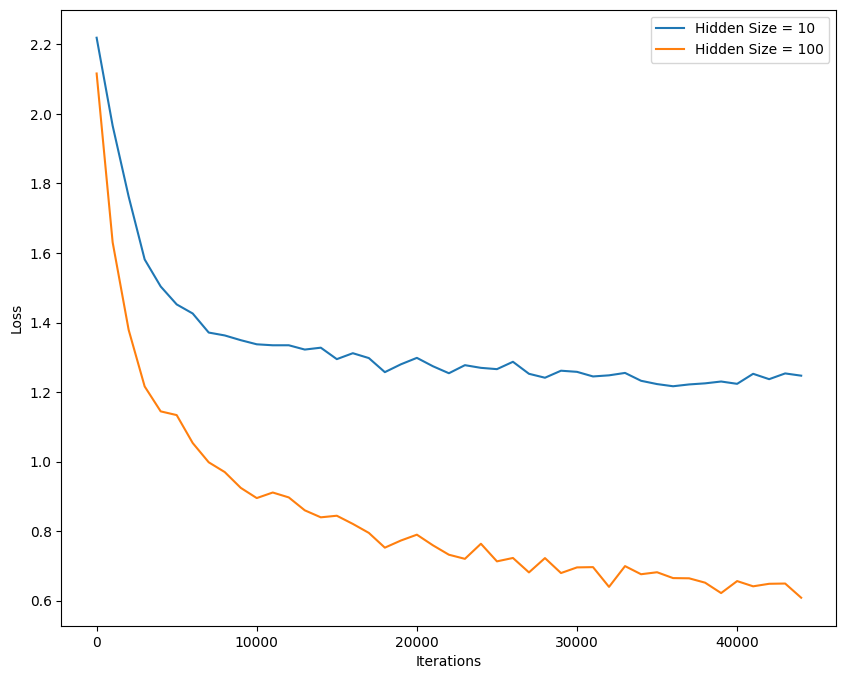

In [225]:
## -- ! code required
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Generate x-values at increments of 1000 steps
x_values_v1 = np.arange(len(stats))* 1000
x_values_v2 = np.arange(len(stats_v2)) * 1000

plt.plot(x_values_v1, stats, label='Hidden Size = 10')
plt.plot(x_values_v2, stats_v2, label='Hidden Size = 100')
plt.legend()

plt.show()

**Solution**
* The neural network's loss decreases with an increase in the number of training steps. However, the final loss of the model with a hidden size of 10 is considerably higher than that of the model with a hidden size of 100. This is because the neural network with a hidden size of 100 has a more complex architecture, allowing it to capture intricate patterns in the data, leading to a lower loss. In contrast, the neural network with a hidden size of 10 has a simpler architecture and might struggle to learn the underlying patterns effectively, resulting in a higher final loss.
* The rate of decrease in loss seems to be steeper for the neural network with a hidden size of 100 compared to the one with a hidden size of 10. This suggests that the larger network is learning more quickly, possibly due to its increased capacity to model the data.